In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [67]:
ad_details = pd.read_csv('ad_details.csv')
ad_details.describe()

,reward,required_amount,duration (days)
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [68]:
ad_events = pd.read_csv('ad_events.csv')
ad_events.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [69]:
customers = pd.read_csv('customer_profiles.csv')
customers.describe()

,age,became_member_on (year month day),income,kids
count,14825.000000,1.482500e+04,14825.000000,14825.000000
mean,54.393524,2.016689e+07,65404.991568,1.690793
std,17.383705,1.188565e+04,21598.299410,1.475529
min,18.000000,2.013073e+07,30000.000000,0.000000
25%,42.000000,2.016052e+07,49000.000000,0.000000
50%,55.000000,2.017080e+07,64000.000000,2.000000
75%,66.000000,2.017123e+07,80000.000000,3.000000
max,101.000000,2.018073e+07,120000.000000,5.000000


In [70]:
#finding K-Means for cusstomers dataset
numeric_columns = customers.select_dtypes(include=['number']).columns
scaler = StandardScaler()
scaled_customers = pd.DataFrame(scaler.fit_transform(customers[numeric_columns]))
scaled_customers

,0,1,2,3
0,0.034889,0.322067,2.157419,0.887310
1,1.185430,0.304735,1.601801,-1.145928
2,0.782741,1.139130,0.212756,0.887310
3,0.610160,1.120872,-0.574370,2.242802
4,0.207470,0.355386,-0.666973,2.242802
...,...,...,...,...
14820,-0.540382,1.154107,-0.528068,-1.145928
14821,0.380051,1.163278,0.305359,1.565056
14822,-0.310274,0.272510,0.351660,0.209564
14823,1.645647,-0.553640,-0.713274,-1.145928


In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [72]:
kmeans.inertia_

38248.828816584

In [73]:
inertias = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_customers)
    inertias.append(kmeans.inertia_)
frame = pd.DataFrame({"Clusters":range(1,20), "Inertias": inertias})

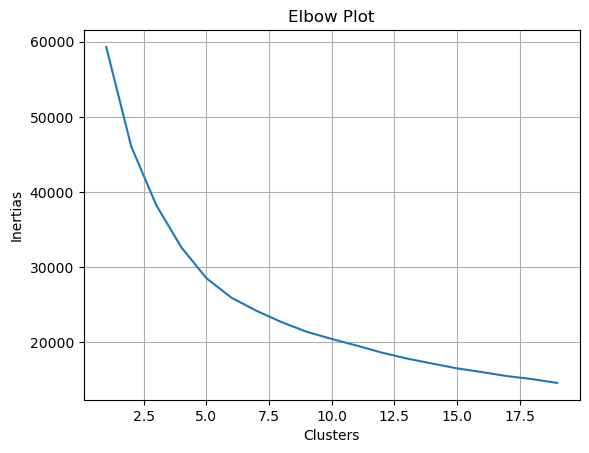

In [ ]:
sns.lineplot(data=frame, x="Clusters", y="Inertias")
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

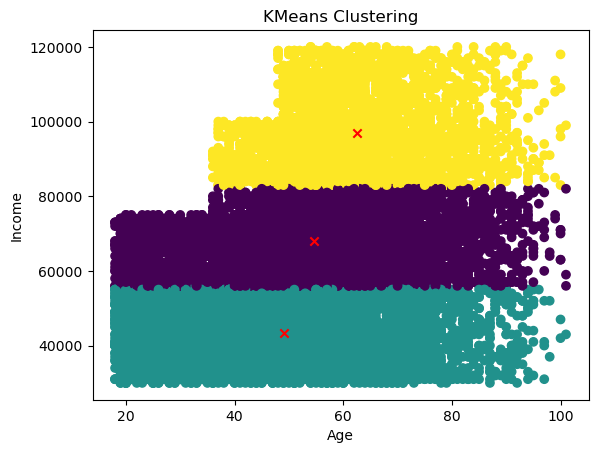

In [ ]:
data = customers[['age', 'income']].values

# Instantiate KMeans with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model
kmeans.fit(data)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster assignments for each data point
labels = kmeans.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x')
plt.title('KMeans Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_customers)
predictions = kmeans.predict(scaled_customers)

In [ ]:
centers = kmeans.cluster_centers_
unscaled_centers = scaler.inverse_transform(centers)
unscaled_centers

array([[6.94200434e+01, 2.01725237e+07, 5.29193198e+04, 1.28509407e+00],
       [3.81535581e+01, 2.01719975e+07, 5.14602996e+04, 2.87116105e+00],
       [6.41423056e+01, 2.01675286e+07, 8.25383343e+04, 3.82349697e+00],
       [6.27358204e+01, 2.01675743e+07, 9.05902335e+04, 9.43281771e-01],
       [3.81180371e+01, 2.01718481e+07, 5.31480990e+04, 2.60831123e-01],
       [5.11560178e+01, 2.01451566e+07, 5.81584943e+04, 1.59286776e+00]])